In [1]:
import numpy as np
import seaborn as sns
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
results.score(X_train, y_train) is the training accuracy, while

accuracy_score(y_test, results.predict(X_test)) is the testing accuracy.

The way I found out that they do the same thing is by inspecting the SK Learn source code. Turns out that the .score() method in the LogisticRegression class directly calls the sklearn.metrics.accuracy_score method... I ran a test to double check and it's confirmed:

Training with LR.score:

model.score(X_train, y_train)
0.72053675612602097
Testing with LR.score:

model.score(X_test, y_test)
0.79582673005810878
Testing with accuracy_score:

accuracy_score(y_test, model.predict(X_test))
0.79582673005810878

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\user\Desktop\cementStrengthPrediction\code\cement_strength_reg\Training_FileFromDB\InputFile.csv")

In [3]:
df.shape

(1030, 9)

In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag _component_2', 'Fly Ash _component_3',
       'Water_component_4', 'Superplasticizer_component_5',
       'Coarse Aggregate_component_6', 'Fine Aggregate_component_7', 'Age_day',
       'Concrete_compressive _strength'],
      dtype='object')

In [5]:
df.isnull().sum()

Cement                             0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


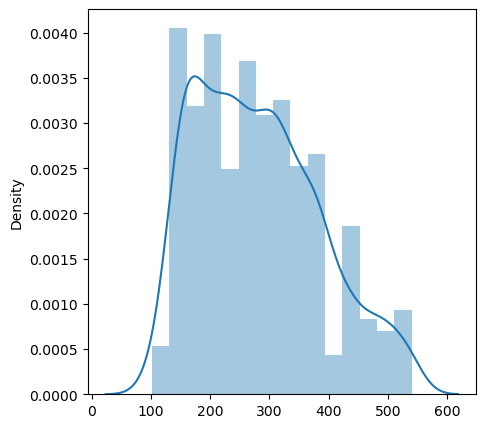

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


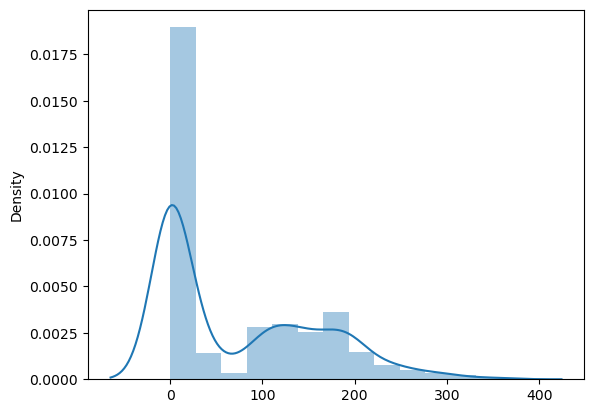

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


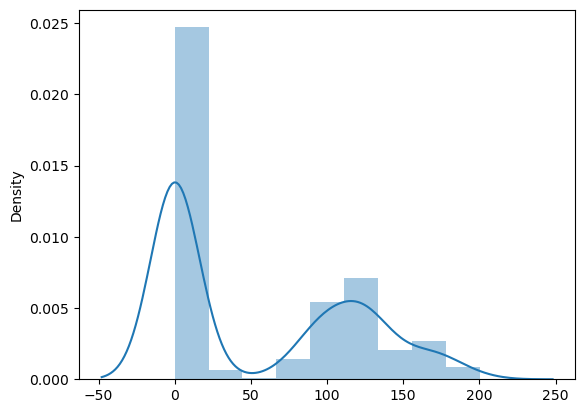

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


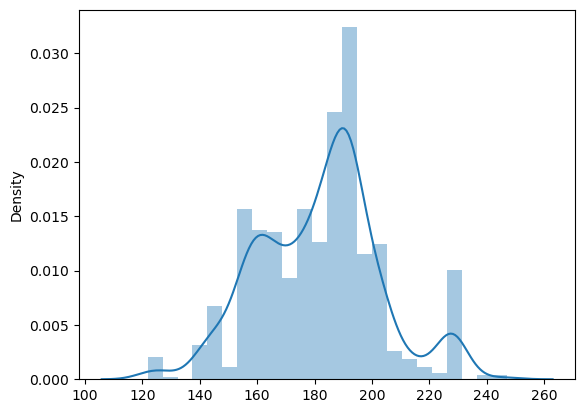

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


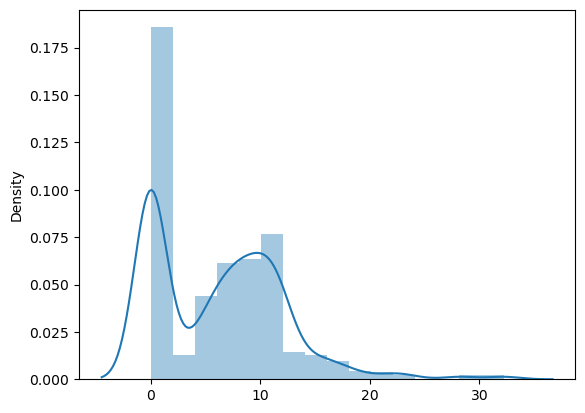

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


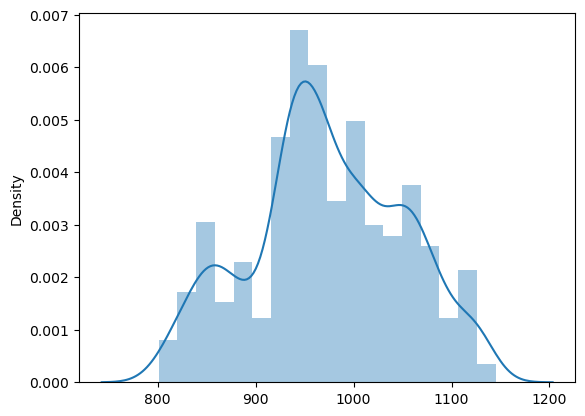

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


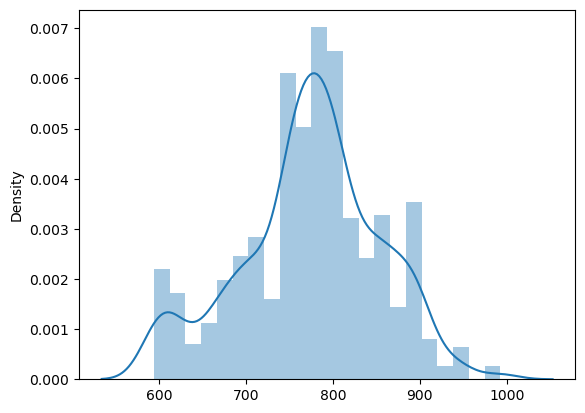

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


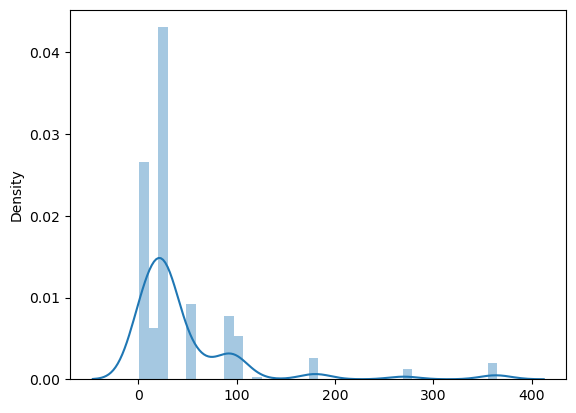

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


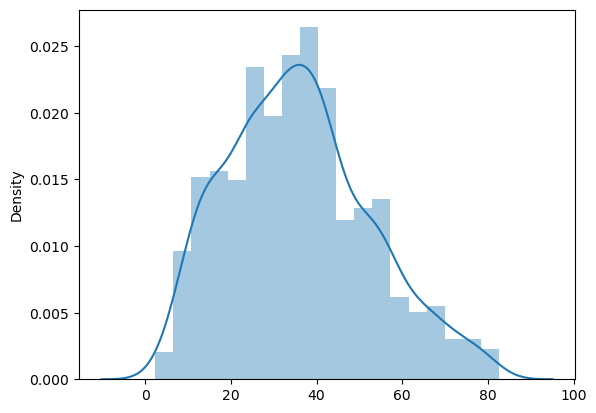

In [6]:
plt.figure(figsize=(5,5))
for i in df.columns:
    sns.distplot(x=df[i],kde=True)
    plt.show()

In [7]:
df.dtypes

Cement                             float64
Blast Furnace Slag _component_2    float64
Fly Ash _component_3               float64
Water_component_4                  float64
Superplasticizer_component_5       float64
Coarse Aggregate_component_6       float64
Fine Aggregate_component_7         float64
Age_day                              int64
Concrete_compressive _strength     float64
dtype: object

In [8]:
df['Age_day'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

In [9]:
df[df.duplicated()]


,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [10]:
df.drop_duplicates()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [12]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
X = df.drop(labels=['Concrete_compressive _strength'],axis=1)
Y = df['Concrete_compressive _strength']

In [59]:
X.shape

(1030, 8)

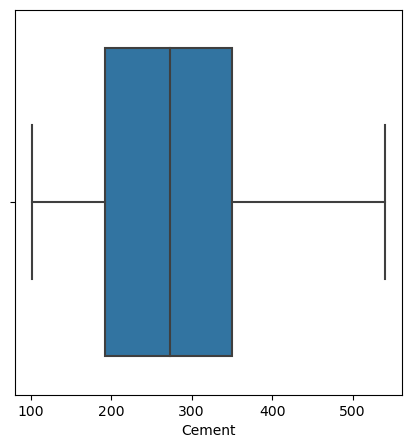

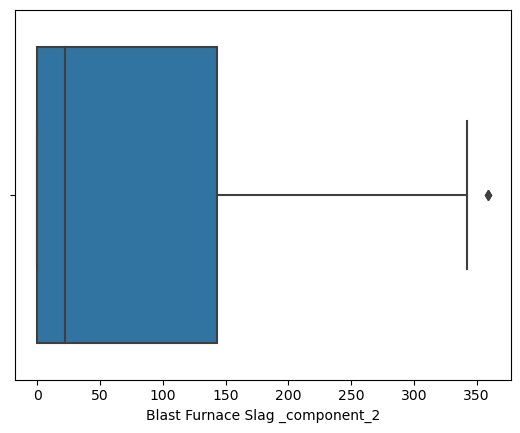

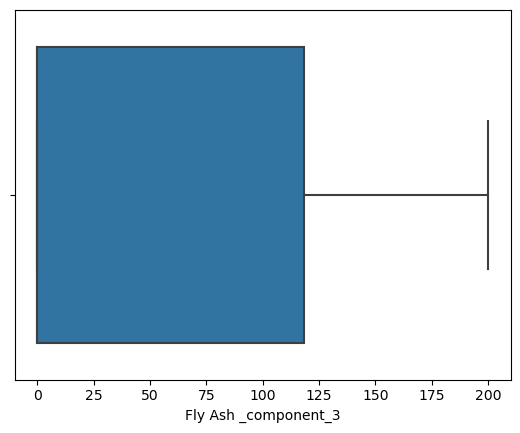

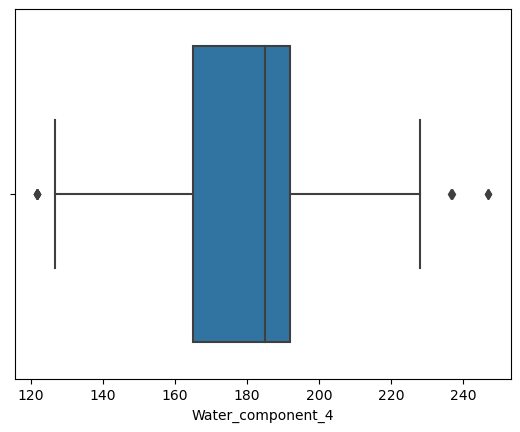

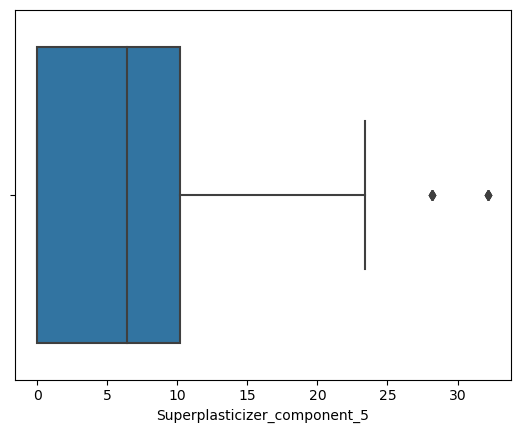

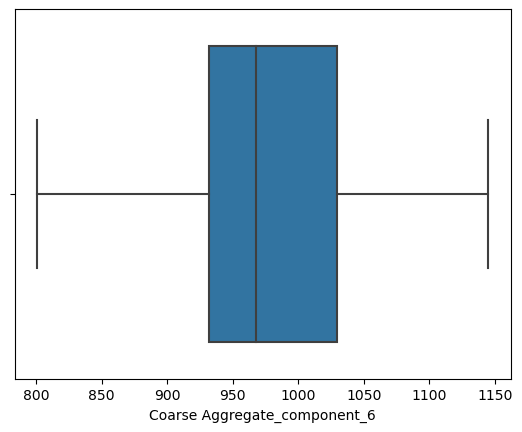

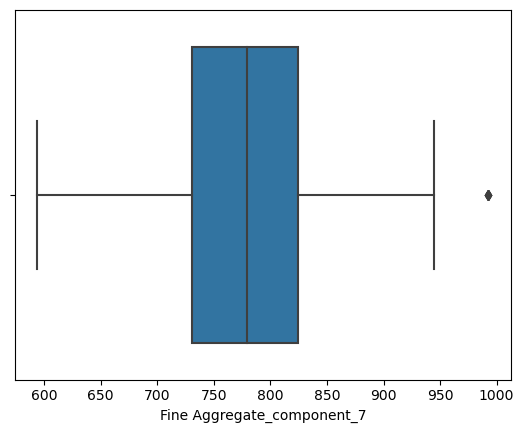

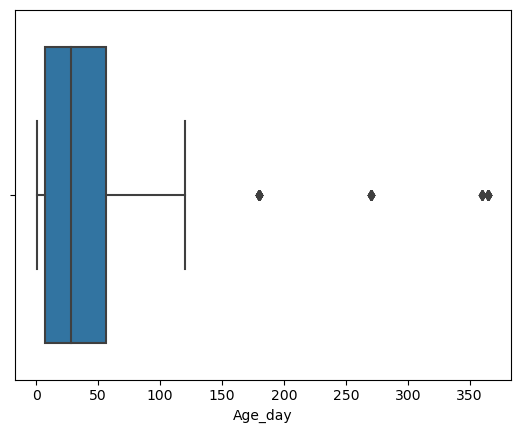

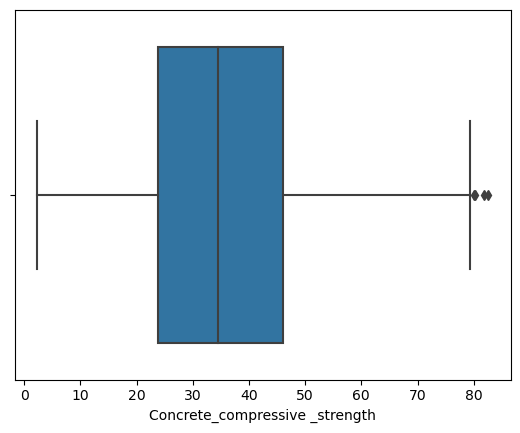

In [60]:
plt.figure(figsize=(5,5))
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

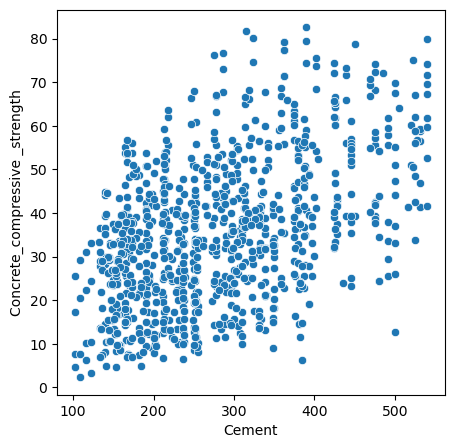

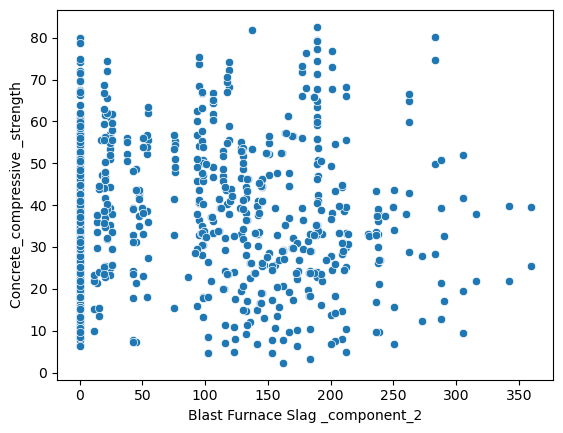

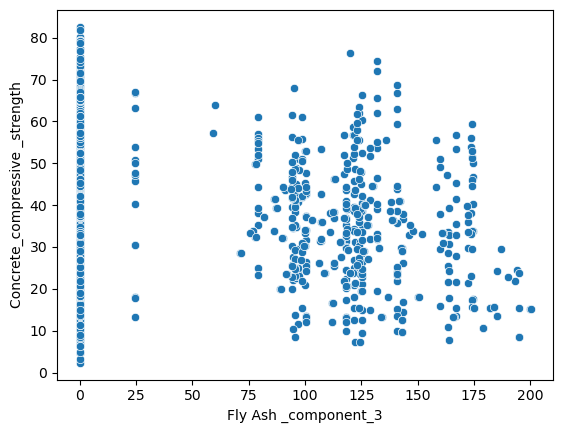

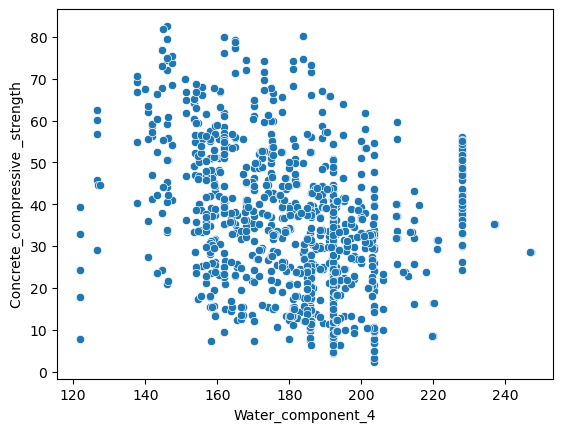

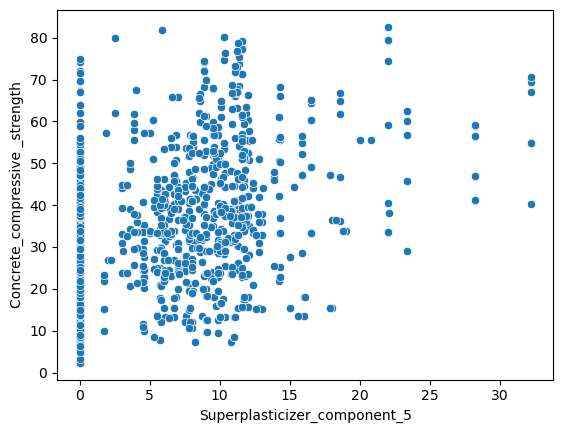

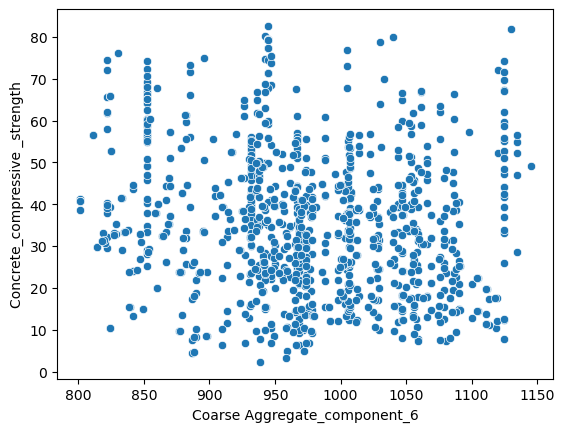

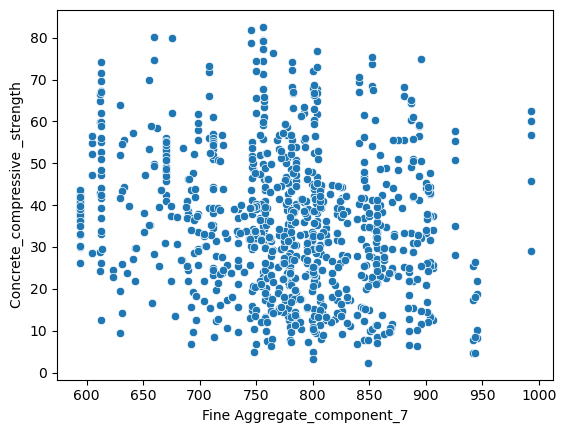

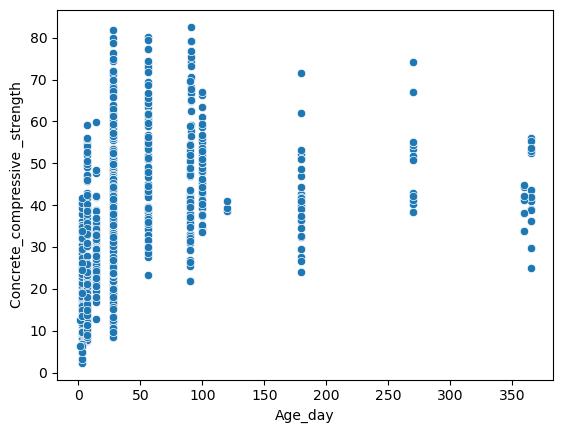

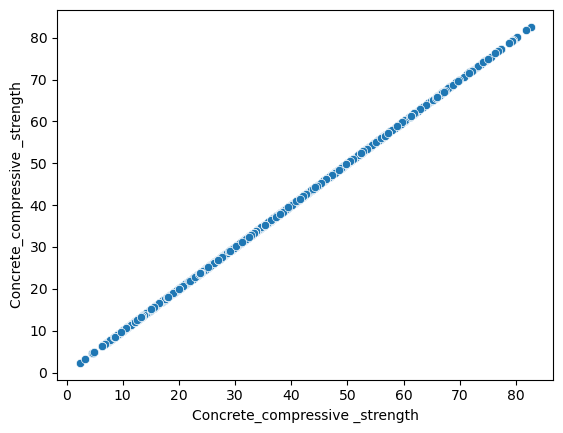

In [62]:
plt.figure(figsize=(5,5))
for i in df.columns:
    sns.scatterplot(x=df[i],y=Y)
    plt.show()

<AxesSubplot:>

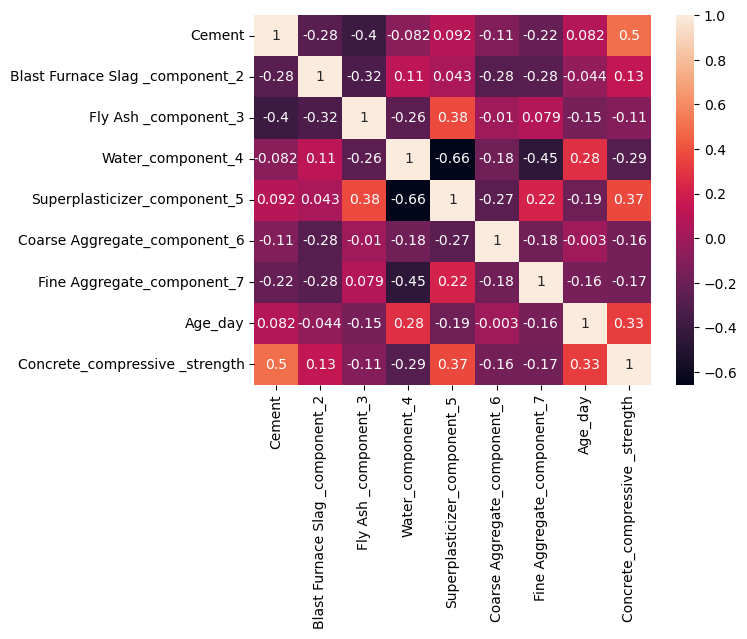

In [63]:
sns.heatmap(df.corr(), annot=True)

In [64]:

for column in X.columns:
    print(X[column])
    X[column]+=1
    X[column] = np.log(X[column])

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: Cement, Length: 1030, dtype: float64
0         0.0
1         0.0
2       142.5
3       142.5
4       132.4
        ...  
1025    116.0
1026      0.0
1027    139.4
1028    186.7
1029    100.5
Name: Blast Furnace Slag _component_2, Length: 1030, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1025     90.3
1026    115.6
1027    108.6
1028      0.0
1029     78.3
Name: Fly Ash _component_3, Length: 1030, dtype: float64
0       162.0
1       162.0
2       228.0
3       228.0
4       192.0
        ...  
1025    179.6
1026    196.0
1027    192.7
1028    175.6
1029    200.6
Name: Water_component_4, Length: 1030, dtype: float64
0        2.5
1        2.5
2        0.0
3        0.0
4        0.0
        ... 
1025     8.9
1026    10.4
1027     6.1
1028    11.3
1029     8.6
Name: Superplastici

In [65]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete_compressive _strength, Length: 1030, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\l

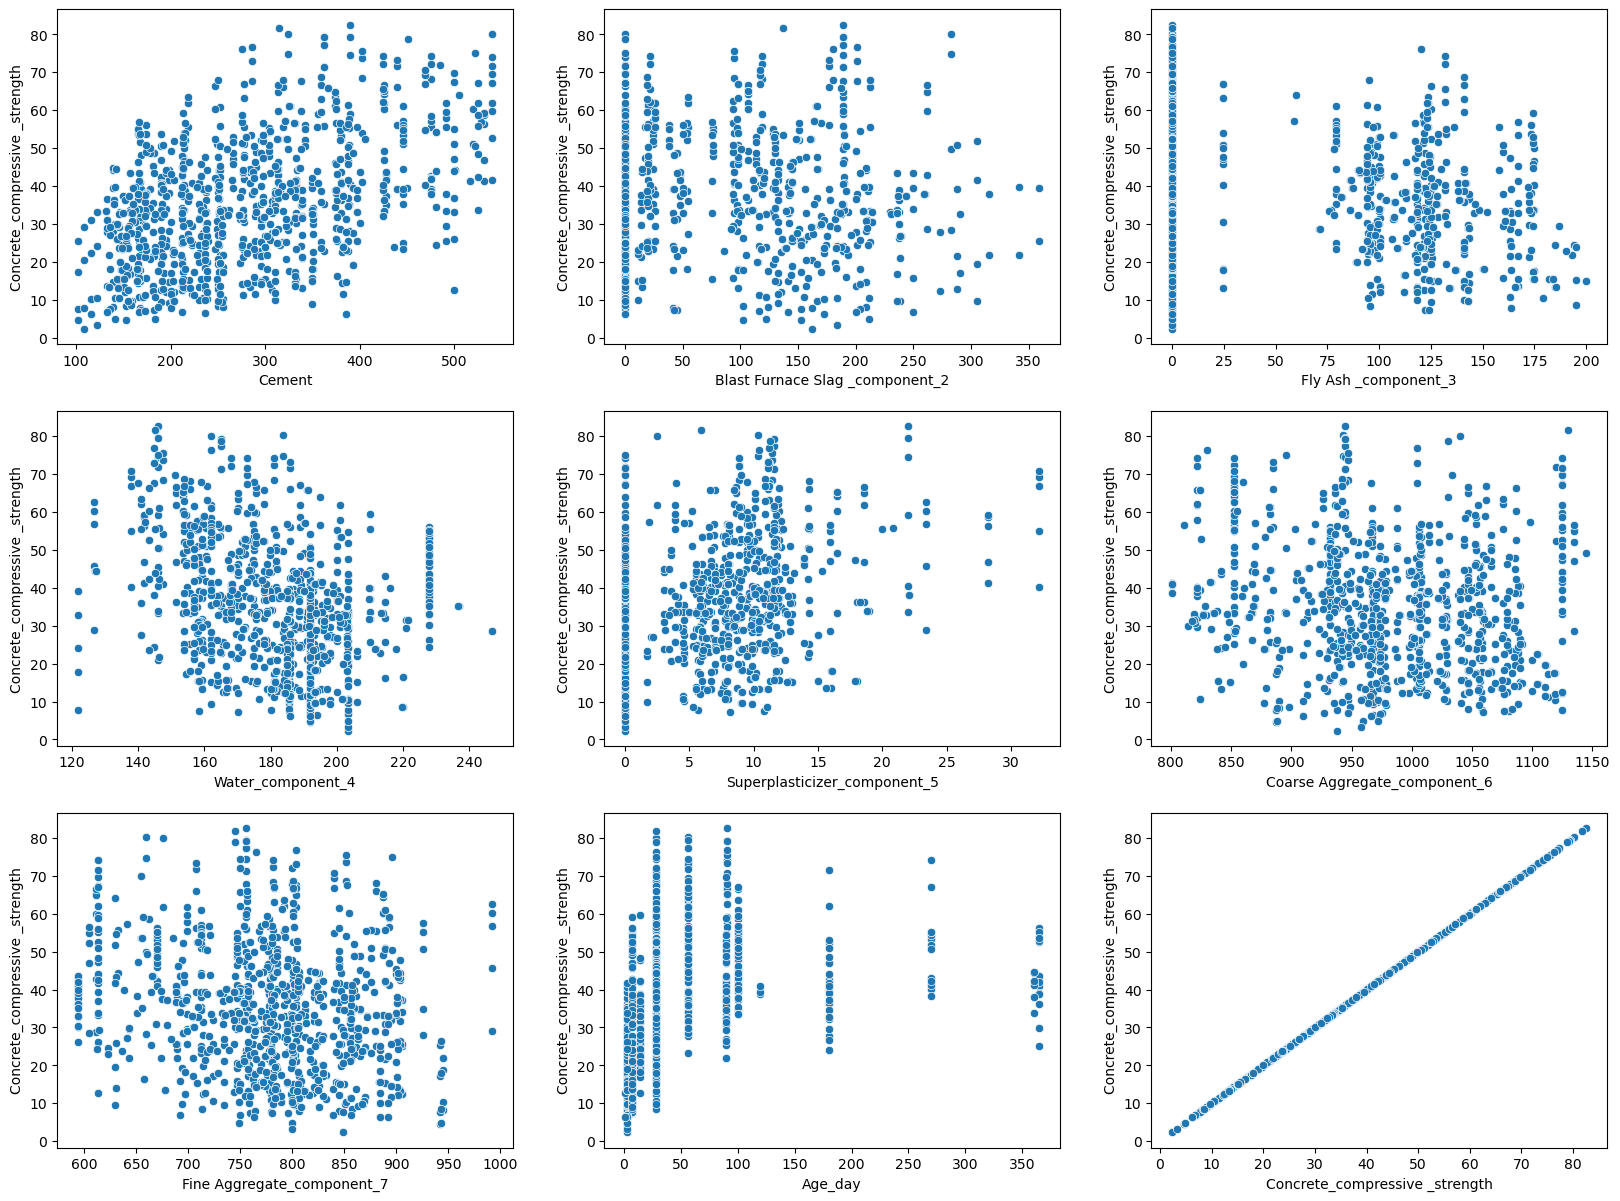

In [66]:
import matplotlib.pyplot as plot
import seaborn as sns
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(df[column],Y)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
for i in range(len(df.columns)-1):
    print(f" {df.columns[i]} vif {variance_inflation_factor(X_train,i)}")

 Cement vif 7.52851036910833
 Blast Furnace Slag _component_2 vif 7.2953429436734485
 Fly Ash _component_3 vif 6.018888543532179
 Water_component_4 vif 7.1845653387253705
 Superplasticizer_component_5 vif 2.977455463263749
 Coarse Aggregate_component_6 vif 5.084545064081869
 Fine Aggregate_component_7 vif 6.818706973449777
 Age_day vif 1.0868468456104543


In [69]:
numerical_cols = X.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['Cement', 'Blast Furnace Slag _component_2', 'Fly Ash _component_3',
       'Water_component_4', 'Superplasticizer_component_5',
       'Coarse Aggregate_component_6', 'Fine Aggregate_component_7',
       'Age_day'],
      dtype='object')


In [70]:

num_pipeline= Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)



preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
])

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())



In [72]:
X_train

,num_pipeline__Cement,num_pipeline__Blast Furnace Slag _component_2,num_pipeline__Fly Ash _component_3,num_pipeline__Water_component_4,num_pipeline__Superplasticizer_component_5,num_pipeline__Coarse Aggregate_component_6,num_pipeline__Fine Aggregate_component_7,num_pipeline__Age_day
0,-0.259727,-1.055679,-0.914110,0.262856,-1.298322,1.788211,0.247293,-1.018116
1,-0.791947,-1.055679,1.032496,-0.689412,0.565699,0.453402,1.558560,0.760642
2,-0.440194,-1.055679,1.016419,0.422522,0.186532,-0.048743,1.176995,-1.646011
3,-0.739515,0.976512,-0.914110,0.540302,-1.298322,0.097698,0.674035,-1.646011
4,-0.846820,-1.055679,1.124935,-0.866914,0.595910,1.459417,0.422895,-0.448684
...,...,...,...,...,...,...,...,...
716,0.652203,-1.055679,-0.914110,0.095514,-0.090845,0.195242,0.575537,0.148501
717,0.464371,-1.055679,-0.914110,-0.089245,0.615484,0.372978,0.633600,0.148501
718,1.657650,0.313070,1.116857,0.921331,0.085919,-2.097813,-0.908785,0.148501
719,-1.796335,1.167322,-0.914110,0.699055,-0.069337,-0.281595,0.319359,0.148501


In [73]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [74]:
models={
    'LinearRegression':LinearRegression(),
    'L1_regularization':Lasso(),
    'L2_regularization':Ridge(),
    'ElasticNet':ElasticNet()
}


import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [75]:
for i in list(models.values()):
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    mae,rmse,r2_square= evaluate_model(y_test,y_pred)

    print(f"Model: {i}")
    print(f"mae: {mae}, rmse: {rmse}, r2_score: {r2_square}")

Model: LinearRegression()
mae: 6.234160336591128, rmse: 8.079765118427643, r2_score: 0.769952216586818
Model: Lasso()
mae: 6.409079602813816, rmse: 8.329439037681064, r2_score: 0.7555150729176641
Model: Ridge()
mae: 6.233632782871224, rmse: 8.07991819527616, r2_score: 0.7699434996692434
Model: ElasticNet()
mae: 7.640520989595587, rmse: 9.754358024683636, r2_score: 0.6647120348083262


In [76]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 

regressor.fit(X_train,y_train) 

RandomForestRegressor(random_state=0)

In [77]:
y_pred=regressor.predict(X_test)

In [78]:
regressor.score(X_test,y_pred)

1.0

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score
from pandas_profiling import ProfileReport

In [80]:
grid_param={
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}

In [81]:
grid_search = GridSearchCV(param_grid= grid_param , estimator= regressor)

In [82]:
y_train

590    10.34
197    33.96
184    11.58
57      9.13
200    21.06
       ...  
898    44.86
919    25.10
500    57.92
941    28.94
421    34.24
Name: Concrete_compressive _strength, Length: 721, dtype: float64

In [83]:
y_train = np.ravel(y_train)

In [84]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [85]:
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 150}

In [86]:
best_regressor= RandomForestRegressor(n_estimators = 150, max_depth=4, random_state = 0)
 

best_regressor.fit(X_train,y_train) 

RandomForestRegressor(max_depth=4, n_estimators=150, random_state=0)

In [87]:
y_pred = best_regressor.predict(X_test)

In [88]:
best_regressor.score(X_test,y_test)

0.7833414579285122

In [89]:
mean_absolute_error(y_test,y_pred)

6.018590202078067

In [90]:
r2_score(y_test,y_pred)

0.7833414579285122